------------------------------
#### Importing required libraries
------------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

------------------------------
#### EXAMPLE 1: Iris Dataset (Gaussian Naive Bayes)
------------------------------

In [27]:
def gaussian_naive_bayes_example():
    print("\n" + "="*80)
    print("EXAMPLE 1: IRIS DATASET - GAUSSIAN NAIVE BAYES")
    print("="*80)
    
    # Load Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    target_names = iris.target_names
    
    print(f"Dataset shape: {X.shape}")
    print(f"Features: {feature_names}")
    print(f"Target classes: {target_names}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Predict
    y_pred = gnb.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy * 100:.4f}%")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix - Gaussian Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return gnb


EXAMPLE 1: IRIS DATASET - GAUSSIAN NAIVE BAYES
Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

Accuracy: 97.7778%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



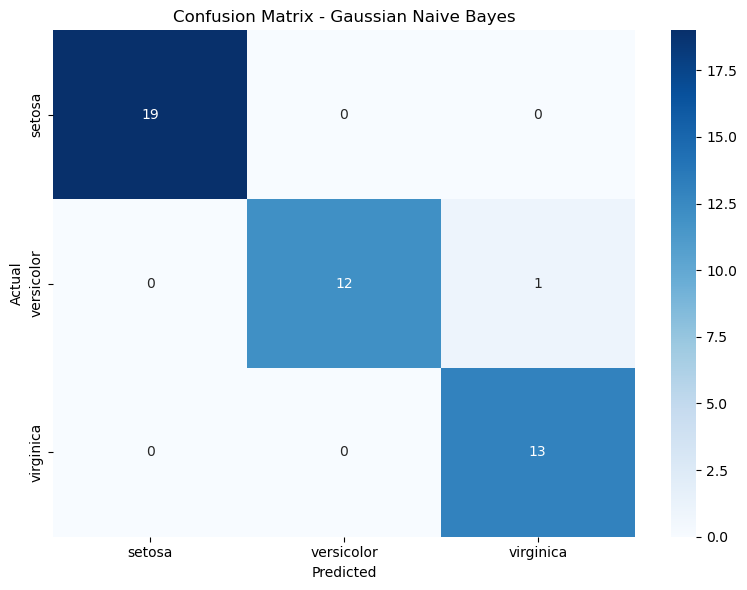

GaussianNB()

In [28]:
gaussian_naive_bayes_example()

------------------------------
#### EXAMPLE 2: Text Classification (Multinomial Naive Bayes)
------------------------------

In [43]:
def multinomial_naive_bayes_example():
    print("\n" + "="*80)
    print("EXAMPLE 2: TEXT CLASSIFICATION - MULTINOMIAL NAIVE BAYES")
    print("="*80)
    
    # Load a subset of the 20 newsgroups dataset
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    newsgroups = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    print(f"Dataset size: {len(newsgroups.data)} documents")
    print(f"Categories: {newsgroups.target_names}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)
    
    # Convert text to features using Count Vectorizer
    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    
    print(f"\nFeature matrix shape after vectorization: {X_train_bow.shape}")
    
    # Train model
    mnb = MultinomialNB()
    mnb.fit(X_train_bow, y_train)
    
    # Predict
    y_pred = mnb.predict(X_test_bow)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
    plt.title('Confusion Matrix - Multinomial Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return mnb, vectorizer



EXAMPLE 2: TEXT CLASSIFICATION - MULTINOMIAL NAIVE BAYES
Dataset size: 2257 documents
Categories: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

Feature matrix shape after vectorization: (1579, 5000)

Accuracy: 0.9676

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.96      0.96      0.96       129
         comp.graphics       0.94      0.99      0.97       169
               sci.med       0.99      0.96      0.97       189
soc.religion.christian       0.97      0.96      0.97       191

              accuracy                           0.97       678
             macro avg       0.97      0.97      0.97       678
          weighted avg       0.97      0.97      0.97       678



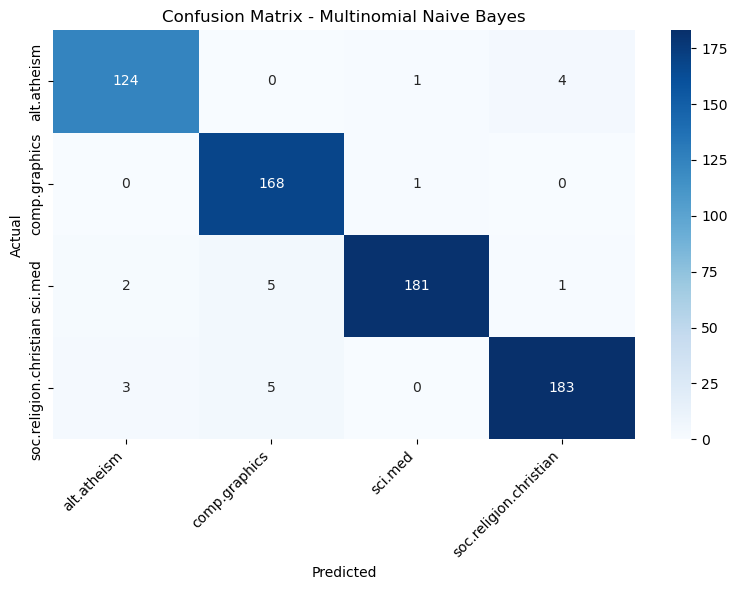

(MultinomialNB(), CountVectorizer(max_features=5000, stop_words='english'))

In [44]:
multinomial_naive_bayes_example()

------------------------------
#### EXAMPLE 3: Spam Detection (Bernoulli Naive Bayes)
------------------------------

In [11]:
def generate_spam_dataset(n_samples=1000):
    """Generate a synthetic spam dataset for demonstration"""
    # Features will be binary (presence/absence of words)
    spam_words = ['free', 'money', 'win', 'offer', 'prize', 'discount', 'limited', 'urgent']
    ham_words = ['meeting', 'report', 'project', 'schedule', 'family', 'friend', 'dinner', 'weekend']
    
    feature_names = spam_words + ham_words
    
    X = np.zeros((n_samples, len(feature_names)))
    y = np.zeros(n_samples)
    
    # Generate spam emails (class 1)
    for i in range(n_samples // 2):
        # Spam emails have higher probability of containing spam words
        for j, word in enumerate(spam_words):
            X[i, j] = np.random.choice([0, 1], p=[0.3, 0.7])
            
        # And lower probability of containing ham words
        for j, word in enumerate(ham_words):
            X[i, j + len(spam_words)] = np.random.choice([0, 1], p=[0.8, 0.2])
            
        y[i] = 1  # Spam class
    
    # Generate ham emails (class 0)
    for i in range(n_samples // 2, n_samples):
        # Ham emails have lower probability of containing spam words
        for j, word in enumerate(spam_words):
            X[i, j] = np.random.choice([0, 1], p=[0.9, 0.1])
            
        # And higher probability of containing ham words
        for j, word in enumerate(ham_words):
            X[i, j + len(spam_words)] = np.random.choice([0, 1], p=[0.4, 0.6])
            
        y[i] = 0  # Ham class
    
    return X, y, feature_names


In [12]:
def bernoulli_naive_bayes_example():
    print("\n" + "="*80)
    print("EXAMPLE 3: SPAM DETECTION - BERNOULLI NAIVE BAYES")
    print("="*80)
    
    # Generate synthetic spam dataset
    X, y, feature_names = generate_spam_dataset(n_samples=1000)
    
    print(f"Dataset shape: {X.shape}")
    print(f"Features (words): {feature_names}")
    print(f"Class distribution: {np.bincount(y.astype(int))}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    
    # Predict
    y_pred = bnb.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title('Confusion Matrix - Bernoulli Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    # Test with a new email example
    print("\nTesting with a new email example:")
    
    # Create a new email with some spam features
    new_email = np.zeros(len(feature_names))
    spam_features = ['free', 'money', 'win']
    
    for word in spam_features:
        if word in feature_names:
            new_email[feature_names.index(word)] = 1
    
    # Make prediction
    prediction = bnb.predict([new_email])[0]
    probabilities = bnb.predict_proba([new_email])[0]
    
    print(f"Email contains words: {[feature_names[i] for i in range(len(new_email)) if new_email[i] == 1]}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")
    print(f"Probability of Ham: {probabilities[0]:.4f}")
    print(f"Probability of Spam: {probabilities[1]:.4f}")
    
    return bnb



EXAMPLE 3: SPAM DETECTION - BERNOULLI NAIVE BAYES
Dataset shape: (1000, 16)
Features (words): ['free', 'money', 'win', 'offer', 'prize', 'discount', 'limited', 'urgent', 'meeting', 'report', 'project', 'schedule', 'family', 'friend', 'dinner', 'weekend']
Class distribution: [500 500]

Accuracy: 0.9933

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       150
        Spam       0.99      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



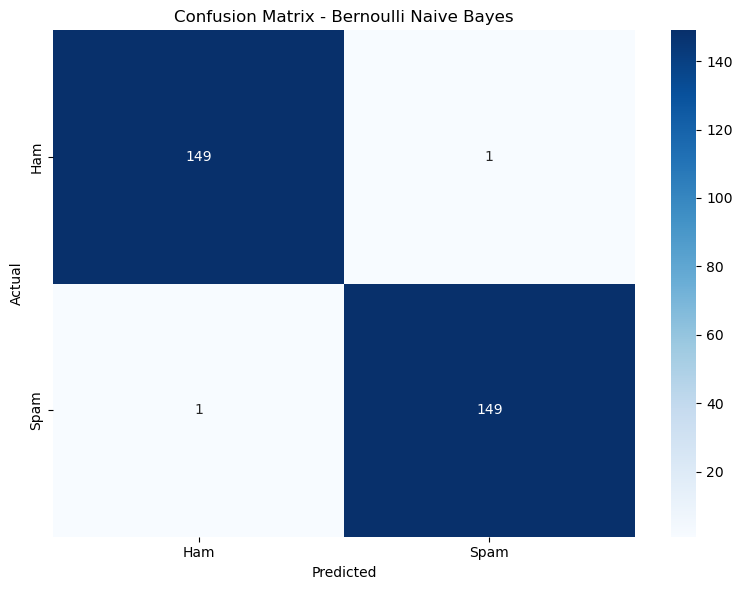


Testing with a new email example:
Email contains words: ['free', 'money', 'win']
Prediction: Spam
Probability of Ham: 0.0019
Probability of Spam: 0.9981


BernoulliNB()

In [13]:
bernoulli_naive_bayes_example()